In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

Reading the pregnancy file and Filtering with live birth records

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Filtering first and other babies and making an histogram

In [3]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

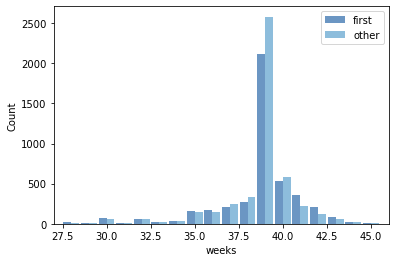

In [4]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

Calculating Summary statictis, Mean, variance and standard deviaiton

In [5]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [6]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [7]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

Function to calculate Cohen's D

In [8]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [9]:
# Solution

CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

In [10]:
# Solution

firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [11]:
# Solution

CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

Means for First Babies are lesser than others. approx 1.7% Based on Cohen's D Value, since the value is -0.089 approx, using which we can somewhat say first babies are slightly lighter. Compared to preglength example, this Cohen's D Value is 3 times approx. However still the values has very minimal difference. If going by Rule of Thumb any value less around +/- 0.2, are considered very small difference.

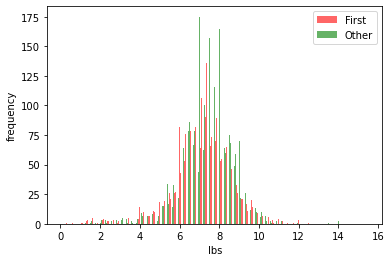

<Figure size 576x432 with 0 Axes>

In [12]:
# Plotting and Checking with Histogram too, to see if there is shift of population
first_hist = thinkstats2.Hist(firsts.totalwgt_lb)
other_hist = thinkstats2.Hist(others.totalwgt_lb)
width = 0.02
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist,align = 'right', width=width, color = 'RED', label = 'First')
thinkplot.Hist(other_hist,align = 'left', width=width, color = 'GREEN', label = 'Other')
thinkplot.Show(xlabel='lbs', ylabel = 'frequency')

Histogram cannot confirm whether the first babies are lighter.